In [69]:
%matplotlib inline

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
from skimage.transform import resize

import os
import tensorflow as tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)
# gpus= tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, Flatten

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import resnet_v2

In [71]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     # Restrict TensorFlow to only allocate 1GB * 3.5 of memory on the first GPU
#     try:
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2.5)])
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Virtual devices must be set before GPUs have been initialized
#         print(e)

# Neural Network Architectures
## Live Demos

In [72]:
VOCABULARY_SIZE = 10000
MAX_NUM_WORDS = 300

EMBEDDING_DIMENSION = 32
BATCH_SIZE = 32

In [73]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = VOCABULARY_SIZE)

In [74]:
x_train.shape

(25000,)

In [75]:
x_train = pad_sequences(x_train, maxlen = MAX_NUM_WORDS, padding = "post", truncating = "post")
x_test = pad_sequences(x_test, maxlen = MAX_NUM_WORDS, padding = "post", truncating = "post")

In [76]:
# x_train.shape

In [77]:
# x_train[0]

In [78]:
# simple_rnn_model = Sequential([
#     Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
#     SimpleRNN(32),
#     Dense(1, activation = "sigmoid")
# ])

In [79]:
# simple_rnn_model.summary()

In [80]:
# simple_rnn_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [81]:
# history = simple_rnn_model.fit(x_train, y_train, epochs = 10, batch_size = BATCH_SIZE)

In [82]:
# lstm_model = Sequential([
#     Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
#     LSTM(32),
#     Dense(1, activation = "sigmoid")
# ])

In [83]:
# lstm_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [84]:
# history = lstm_model.fit(x_train, y_train, epochs = 10, batch_size = BATCH_SIZE)

In [85]:
# stacked_lstm_model = Sequential([
#     Embedding(input_dim = VOCABULARY_SIZE, output_dim = EMBEDDING_DIMENSION),
#     LSTM(32, return_sequences = True),
#     LSTM(32),
#     Dense(1, activation = "sigmoid")
# ])

In [86]:
# stacked_lstm_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [87]:
# history = stacked_lstm_model.fit(x_train, y_train, validation_split = 0.25, epochs = 10, batch_size = BATCH_SIZE)

In [88]:
# history.history

In [89]:
vgg16_model = vgg16.VGG16()

In [90]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [91]:
IMAGE_SHAPE = (224, 224)

In [92]:
# cat_image = imread("https://i.guim.co.uk/img/media/7a633730f5f90db3c12f6efc954a2d5b475c3d4a/0_138_5544_3327/master/5544.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=27c09d27ccbd139fd0f7d1cef8f7d41d")
cat_image = imread("https://cdn.mos.cms.futurecdn.net/VSy6kJDNq2pSXsCzb6cvYF.jpg")

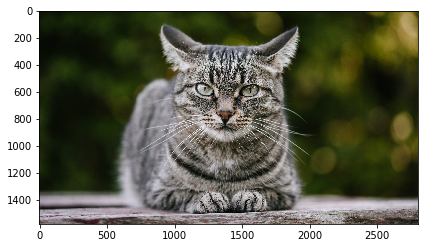

In [93]:
imshow(cat_image)

In [94]:
cat_image.shape

(1575, 2800, 3)

In [95]:
cat_image = resize(cat_image, IMAGE_SHAPE, preserve_range = True)

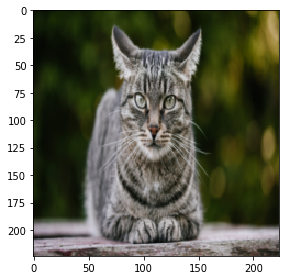

In [96]:
imshow(cat_image.astype(np.uint8))

In [97]:
cat_image = vgg16.preprocess_input(cat_image)

In [98]:
cat_image.shape

(224, 224, 3)

In [99]:
cat_image = tf.expand_dims(cat_image, axis = 0)

In [100]:
cat_image

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float64, numpy=
array([[[[ -98.939     , -100.779     , -113.68      ],
         [ -98.939     ,  -99.51728125, -112.68      ],
         [ -98.939     ,  -97.779     , -112.68      ],
         ...,
         [ -93.189     ,  -25.013375  ,  -21.93      ],
         [-101.93509375,  -37.529     ,  -40.18      ],
         [-103.939     ,  -48.779     ,  -55.93      ]],

        [[ -98.939     ,  -99.779     , -113.68      ],
         [ -98.939     ,  -98.779     , -112.68      ],
         [ -98.939     ,  -96.779     , -111.68      ],
         ...,
         [ -90.142125  ,  -20.982125  ,  -18.133125  ],
         [-100.939     ,  -37.529     ,  -40.18      ],
         [-103.892125  ,  -48.779     ,  -56.93      ]],

        [[ -99.939     ,  -99.779     , -113.68      ],
         [ -99.689     ,  -97.779     , -112.68      ],
         [ -98.24759375,  -95.779     , -111.68      ],
         ...,
         [ -83.360875  ,  -14.200875  ,  -11.04328125],


In [101]:
predictions = vgg16_model.predict(cat_image)

In [102]:
vgg16.decode_predictions(predictions, top = 20)

[[('n02123159', 'tiger_cat', 0.71372974),
  ('n02123045', 'tabby', 0.20306794),
  ('n02124075', 'Egyptian_cat', 0.07133592),
  ('n02127052', 'lynx', 0.0057625673),
  ('n02129604', 'tiger', 0.0011601449),
  ('n03223299', 'doormat', 0.00030127133),
  ('n04589890', 'window_screen', 0.00020518524),
  ('n04040759', 'radiator', 0.00020208815),
  ('n04355338', 'sundial', 0.00019117598),
  ('n02128757', 'snow_leopard', 0.00018404864),
  ('n03903868', 'pedestal', 0.00017468636),
  ('n03950228', 'pitcher', 0.000110944886),
  ('n02123394', 'Persian_cat', 0.00010569447),
  ('n04435653', 'tile_roof', 0.000100648365),
  ('n04409515', 'tennis_ball', 9.894009e-05),
  ('n04522168', 'vase', 8.810015e-05),
  ('n02909870', 'bucket', 7.9551864e-05),
  ('n03388043', 'fountain', 6.8499685e-05),
  ('n02125311', 'cougar', 6.826452e-05),
  ('n03498962', 'hatchet', 6.2752115e-05)]]

In [103]:
resnet_model = resnet_v2.ResNet101V2()

In [104]:
resnet_model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [105]:
cat_image_resnet = imread("https://static.nationalgeographic.co.uk/files/styles/image_3200/public/01-cat-names-nationalgeographic_1525054.jpg?w=1900&h=1267")

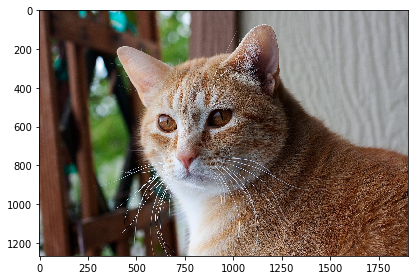

In [106]:
imshow(cat_image_resnet)

In [107]:
cat_image_resnet = resize(cat_image_resnet, IMAGE_SHAPE, preserve_range = True)

In [108]:
cat_image_resnet = resnet_v2.preprocess_input(cat_image_resnet)

In [109]:
cat_image_resnet = tf.expand_dims(cat_image_resnet, axis = 0)

In [110]:
predictions = resnet_model.predict(cat_image_resnet)

In [111]:
resnet_v2.decode_predictions(predictions, top = 20)

[[('n02123159', 'tiger_cat', 0.47579956),
  ('n02123045', 'tabby', 0.35940728),
  ('n02124075', 'Egyptian_cat', 0.16467297),
  ('n02127052', 'lynx', 2.4455929e-05),
  ('n02971356', 'carton', 9.996848e-06),
  ('n03958227', 'plastic_bag', 8.877172e-06),
  ('n04265275', 'space_heater', 8.455024e-06),
  ('n04040759', 'radiator', 5.188617e-06),
  ('n02129604', 'tiger', 3.0231038e-06),
  ('n04367480', 'swab', 2.9636537e-06),
  ('n02110806', 'basenji', 2.607657e-06),
  ('n04589890', 'window_screen', 2.5056652e-06),
  ('n02909870', 'bucket', 1.9505171e-06),
  ('n03482405', 'hamper', 1.9148827e-06),
  ('n03085013', 'computer_keyboard', 1.8637222e-06),
  ('n04033995', 'quilt', 1.4637064e-06),
  ('n03337140', 'file', 1.4454664e-06),
  ('n02870880', 'bookcase', 1.4003916e-06),
  ('n02123597', 'Siamese_cat', 1.0620405e-06),
  ('n03642806', 'laptop', 9.971525e-07)]]

In [112]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [113]:
vgg16_model.layers[0].output

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [114]:
[(index, layer.name) for (index, layer) in enumerate(vgg16_model.layers)]

[(0, 'input_3'),
 (1, 'block1_conv1'),
 (2, 'block1_conv2'),
 (3, 'block1_pool'),
 (4, 'block2_conv1'),
 (5, 'block2_conv2'),
 (6, 'block2_pool'),
 (7, 'block3_conv1'),
 (8, 'block3_conv2'),
 (9, 'block3_conv3'),
 (10, 'block3_pool'),
 (11, 'block4_conv1'),
 (12, 'block4_conv2'),
 (13, 'block4_conv3'),
 (14, 'block4_pool'),
 (15, 'block5_conv1'),
 (16, 'block5_conv2'),
 (17, 'block5_conv3'),
 (18, 'block5_pool'),
 (19, 'flatten'),
 (20, 'fc1'),
 (21, 'fc2'),
 (22, 'predictions')]

In [115]:
vgg16_model.layers[0]

In [116]:
vgg16_model.layers[14]

In [117]:
transfer_learning_model = Model(inputs = vgg16_model.layers[0].input, outputs = vgg16_model.layers[14].output)

In [118]:
transfer_learning_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [119]:
for layer in transfer_learning_model.layers:
    layer.trainable = False

In [120]:
transfer_learning_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [121]:
custom_model = Sequential([
    transfer_learning_model,
    Flatten(),
    Dense(150, activation = "relu"),
    Dense(200, activation = "relu"),
    Dense(50, activation = "relu"),
    Dense(2, activation = "sigmoid"),
])

In [122]:
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 14, 14, 512)       7635264   
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               15052950  
_________________________________________________________________
dense_5 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 102       
Total params: 22,728,566
Trainable params: 15,093,302
Non-trainable params: 7,635,264
__________________________________

In [123]:
vgg16_model.layers

In [124]:
vgg16_model.layers[9].name

'block3_conv3'

In [125]:
layer_to_examine = vgg16_model.layers[9]

In [126]:
len(layer_to_examine.bias.numpy())

256

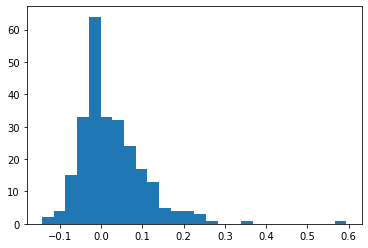

In [127]:
plt.hist(layer_to_examine.bias.numpy(), bins = "fd")
plt.show()

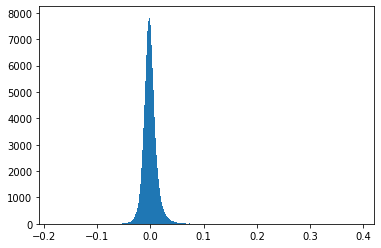

In [128]:
plt.hist(layer_to_examine.kernel.numpy().ravel(), bins = "fd")
plt.show()

In [129]:
kernels = vgg16_model.layers[1].kernel.numpy()[:, :, :, 0]

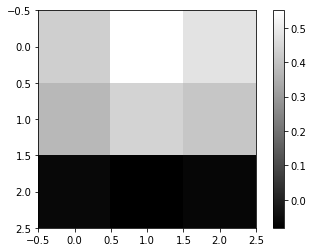

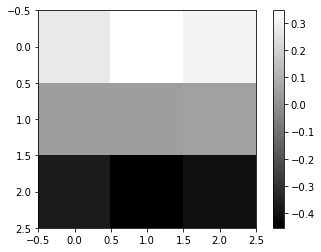

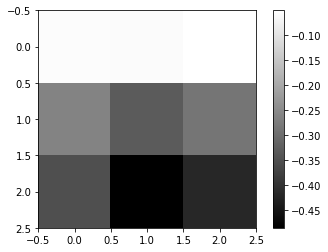

In [130]:
for i in range(kernels.shape[-1]):
    plt.imshow(kernels[i], cmap = "gray")
    plt.colorbar()
    plt.show()

In [131]:
model_to_examine = Model(inputs = vgg16_model.input, outputs = layer_to_examine.output)

In [132]:
model_to_examine.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [133]:
layer_outputs = model_to_examine.predict(cat_image)[0]

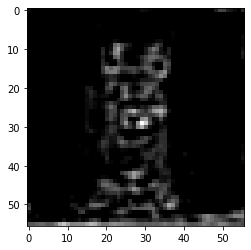

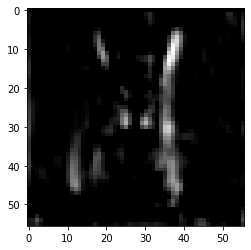

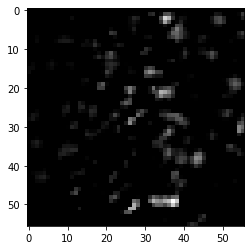

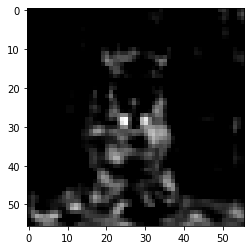

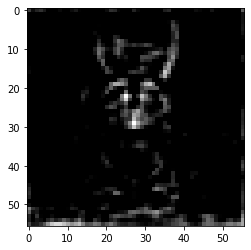

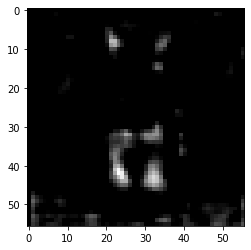

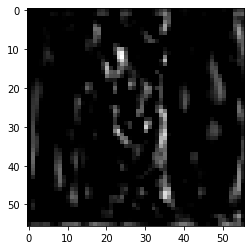

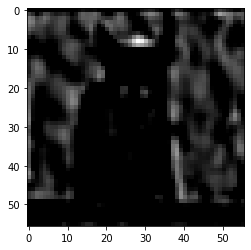

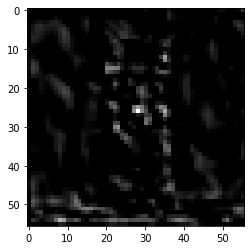

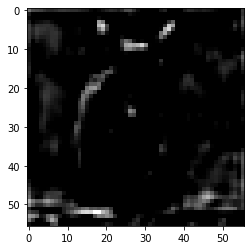

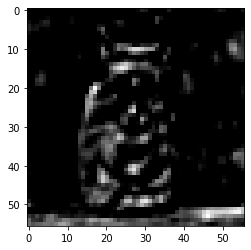

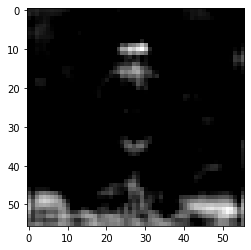

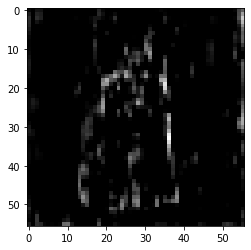

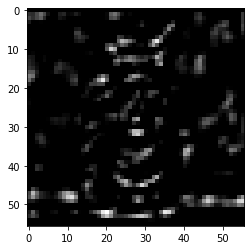

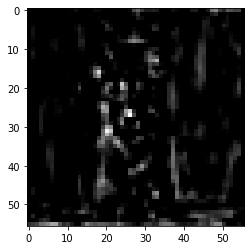

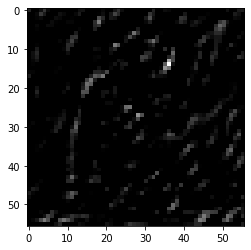

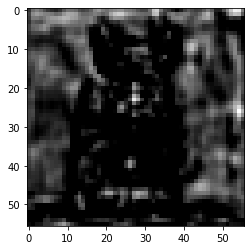

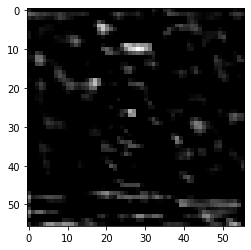

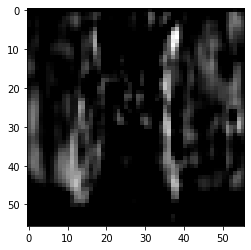

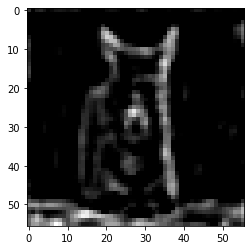

In [134]:
# for i in range(layer_outputs.shape[-1]):
for i in range(20):
    plt.imshow(layer_outputs[:, :, i], cmap = "gray")
    plt.show()

In [135]:
layer_outputs.mean(axis = (0, 1))

array([173.74843 , 170.51352 , 132.6706  , 158.9768  ,  98.05068 ,
        67.06871 , 136.61919 , 395.86862 , 155.20422 ,  72.34345 ,
       191.90938 , 204.81665 ,  80.192345, 155.70767 , 133.57948 ,
        93.00571 , 346.4335  , 124.71198 , 342.85596 , 246.10347 ,
        45.706806,  37.676926,  84.44973 ,  79.6827  , 137.11404 ,
       123.39309 ,  77.34334 , 202.68523 , 164.5401  , 190.65161 ,
       191.00092 ,  44.183136,  44.678543, 108.13263 , 176.89288 ,
       105.90989 ,  89.282234,  49.22126 , 130.77309 ,  91.78343 ,
        70.89181 , 168.84349 ,  93.00579 ,  87.410995,  47.421856,
       175.77834 , 102.018776,  25.592766, 119.25203 , 141.62714 ,
       203.82701 ,  85.629715, 141.23106 , 149.09923 , 282.43225 ,
       115.16155 , 105.34804 , 150.34467 , 115.926605, 109.865326,
       350.73026 , 263.04617 , 177.10555 ,  84.95599 , 197.99576 ,
       186.95444 , 171.70981 , 217.7384  , 334.06305 ,  40.989002,
       225.29721 , 124.23297 , 103.10839 , 102.541374, 119.095

In [136]:
vgg16_model